# Machine Learning Assessment 2019
## This assessment concerns the well-known Boston House Prices dataset and the Python packages Scipy, Keras, and Jupyter.

Import the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

Import the Boston Housing dataset and initialise the Data Frame

In [6]:
data = pd.read_csv('boston.csv')

Rename medv column to Price 

In [7]:
data.rename(columns={'medv':'Price'}, inplace=True)

Pandas data.describe generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. The result’s index include count, mean, std, min, max as well as lower, 50 and upper percentiles

In [8]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Print data shape and data type information.

In [25]:
data.shape

(506, 15)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
Price         506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [13]:
print(data.columns)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'Price'],
      dtype='object')


The Boston Housing Dataset is a derived from data collected in 1978 by the Uunied States Census Service concerning housing in suburbs of Boston Massachusetts. The dataset column headings are described as follows:
The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data of 13 attributes and one target column named price for homes from various suburbs in Boston, Massachusetts. The objective here is to predict house prices.
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town
- Black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- Price - Median value of owner-occupied homes in $1000’s

After loading the data, check to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [40]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
Price         0
dtype: int64

### Analysis of difference in median house prices between houses along Charles riverand those that aren't

How many of the suburbs are along the Charles river? 
variable = 1 if tract bounds river; 0 otherwise

In [58]:
pd.pivot_table(df,index=["chas"],values=["Price"],aggfunc=np.mean)

,Price
chas,
0,22.093843
1,28.440000


In [62]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [66]:
dfil = df.filter(["chas","Price"])

In [67]:
dfil.corr()

,chas,Price
chas,1.00000,0.17526
Price,0.17526,1.00000


In [ ]:
Use scatterplot to show the influence of house position relative to Charles river. 

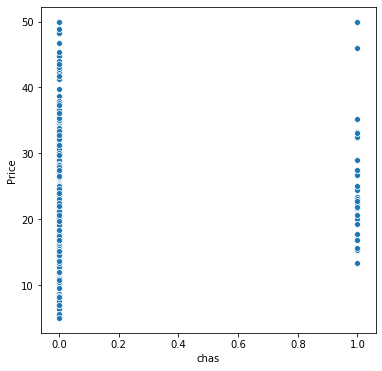

In [40]:
#sns.distplot(df[col])
plt.rcParams['figure.figsize'] = (6,6)
sns.scatterplot(x=data["chas"], y=data["Price"])

In [ ]:
### Linear Regression 

In [46]:
# define the data df as a dataframe
df = pd.DataFrame(data)

# Put the target housing price in another dataFrame
target = pd.DataFrame(data, columns=["Price"])

In [47]:
import statsmodels.api as sm

X = df["chas"]
y = target["Price"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics from statsmodel
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              52.69
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                    1.48e-12
Time:                        23:02:28   Log-Likelihood:                         -2308.0
No. Observations:                 506   AIC:                                      4618.
Df Residuals:                     505   BIC:                                      4622.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
chas          28.4400      3.918      7.259      0.000      20.743      36.137
==============================================================================
Omnibus:                       24.458   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.858
Skew:                          -0.061   Prob(JB):                     6.77e-16
Kurtosis:                       4.816   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The price of the houses is our target variable and the remaining columns are the feature variables which we will use to predict the value of a house.

In [41]:
# Calculate and print statistics
print ("Statistics for Boston housing dataset as follows:\n")
print ("Minimum price: ${:,.2f}".format(data.Price.min()))
print ("Maximum price: ${:,.2f}".format(data.Price.max()))
print ("Mean price: ${:,.2f}".format(data.Price.mean()))
print ("Median price ${:,.2f}".format(data.Price.median()))
print ("Standard deviation of prices: ${:,.2f}".format(data.Price.std(ddof=0)))
print ("First quartile of prices: ${:,.2f}".format(np.percentile(data.Price, 25)))
print ("Second quartile of prices: ${:,.2f}".format(np.percentile(data.Price, 75)))
print ("Interquartile (IQR) of prices: ${:,.2f}".format((np.percentile(data.Price, 75)-(np.percentile(data.Price, 25)))))

Statistics for Boston housing dataset as follows:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $17.02
Second quartile of prices: $25.00
Interquartile (IQR) of prices: $7.98


Next we will use Exploratory Data Analysis to viaualise the relationship between price and the other attributes of the data set. This is an important step before training the data model. The following plot shows the distribution of the target variable MEDV which has been renamed as Price. Most values are distributed normally with a few outliers. 

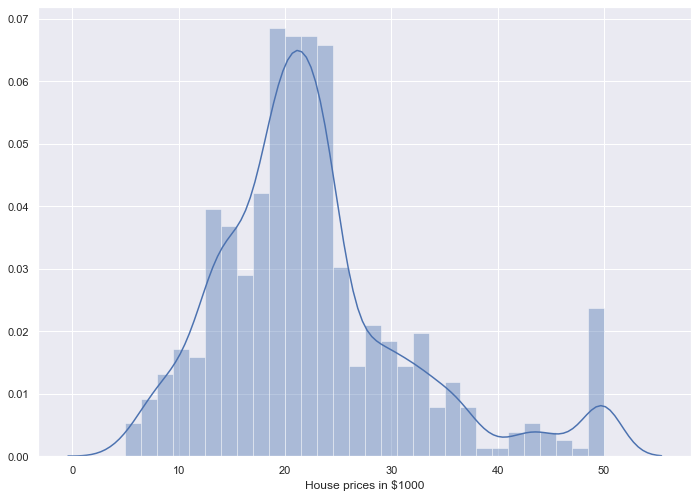

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Price'], bins=30)
plt.xlabel("House prices in $1000")
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

Now we will use scatter plots of how the housing value relates to the other columns in the dataset.

In [43]:
df1 = data.drop(columns=['Unnamed: 0', 'Price'])

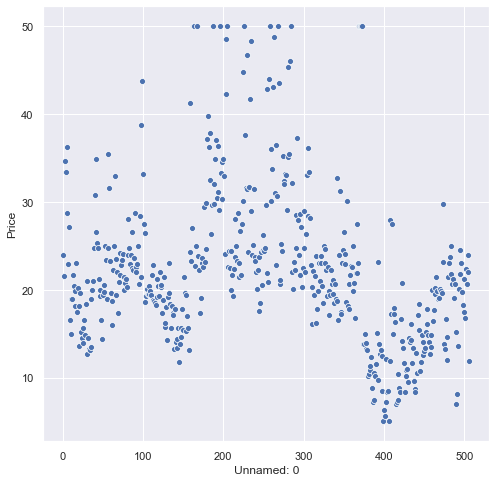

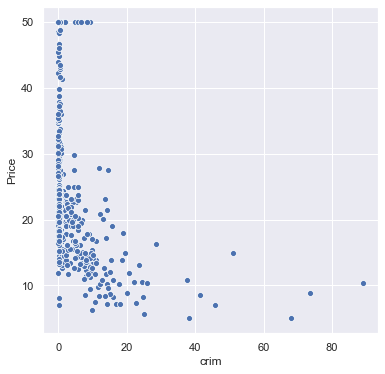

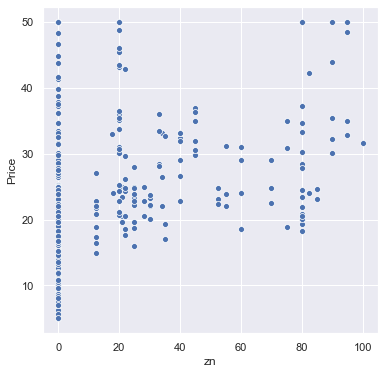

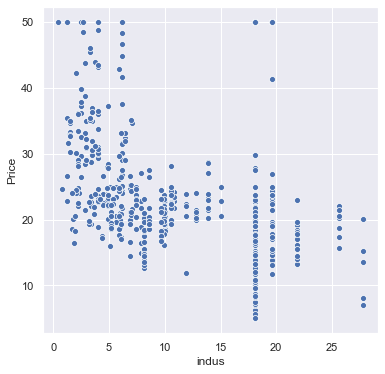

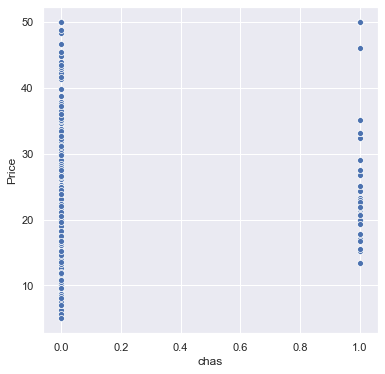

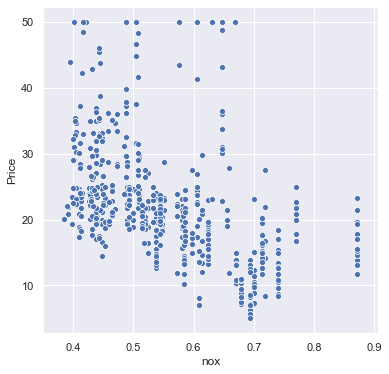

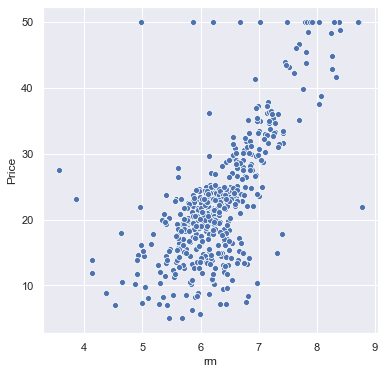

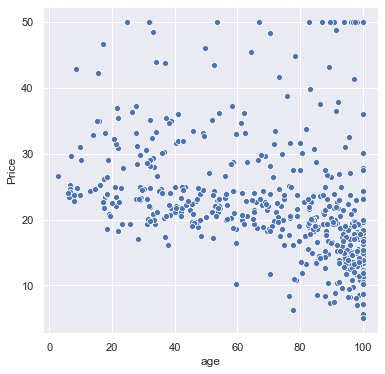

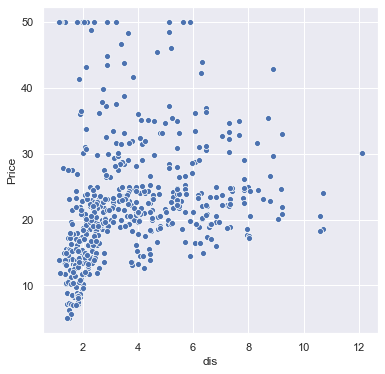

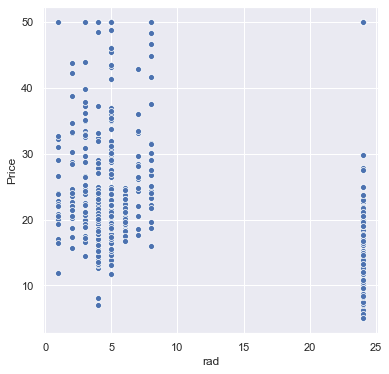

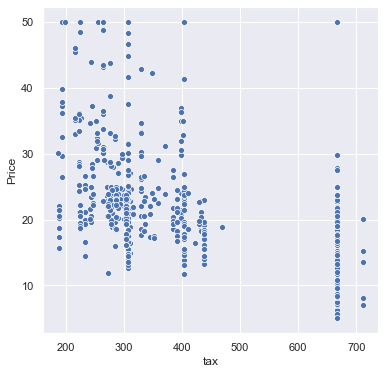

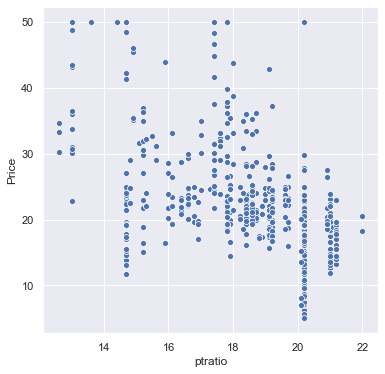

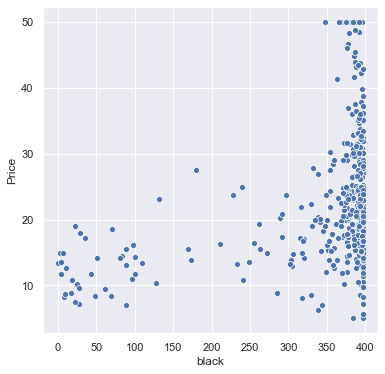

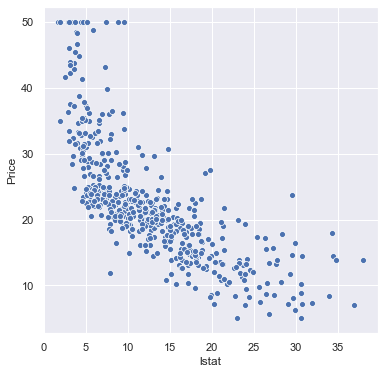

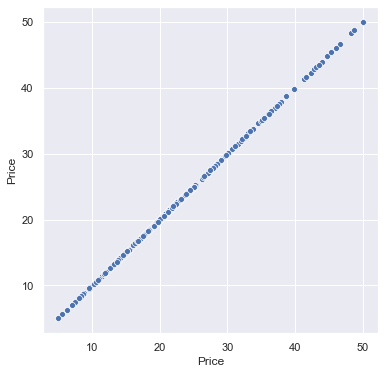

In [44]:
for i, col in enumerate(data.columns):

    plt.figure(i)
    #sns.distplot(df[col])
    plt.rcParams['figure.figsize'] = (6,6)
    sns.scatterplot(x=data[col], y=data["Price"])

The average number of rooms per dwelling (rm) looks most like a linear relationship. We will now use lmplot between rm and price to further explore the relationship between the two.

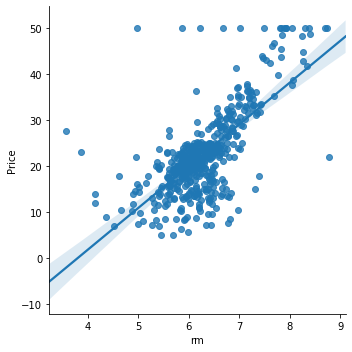

In [35]:
sns.lmplot(x = 'rm', y = 'Price', data = data )

## Training the Model
We will now train our model using the LinearRegression function from the sklearn library using one variable 'rm'

In [45]:
# define the data df as a dataframe
df = pd.DataFrame(data)

# Put the target housing price in another dataFrame
target = pd.DataFrame(data, columns=["Price"])

In [46]:
import statsmodels.api as sm

X = df["rm"]
y = target["Price"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics from statsmodel
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sat, 07 Dec 2019   Prob (F-statistic):                   3.74e-256
Time:                        08:35:34   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regrssion model with more than one variable

In [47]:
X = data[["rm","lstat"]]
y = target["Price"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sat, 07 Dec 2019   Prob (F-statistic):                        0.00
Time:                        08:35:35   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             4.9069      0.070     69.906      0.000       4.769       5.045
lstat         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Simple linear regression analysis is a statistical tool for quantifying the relationship between one independent variable and one dependent variable based on past experience or observations. The following histogram is used to predict price

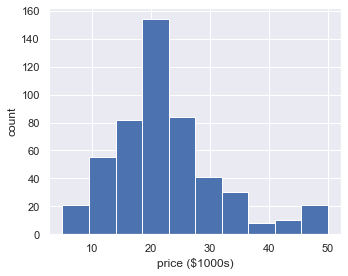

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.hist(data.Price)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [49]:
df1 = df.drop(columns=['Unnamed: 0', 'Price'])

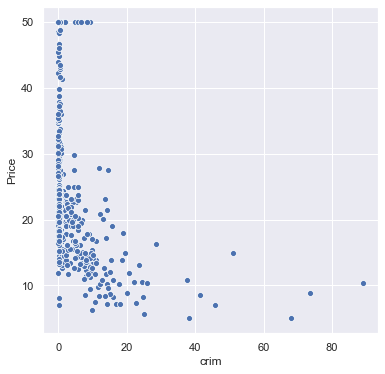

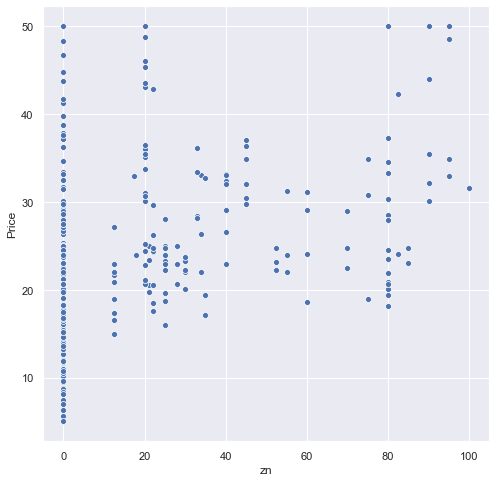

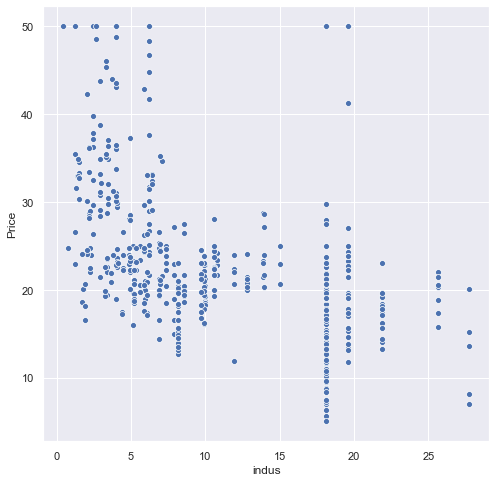

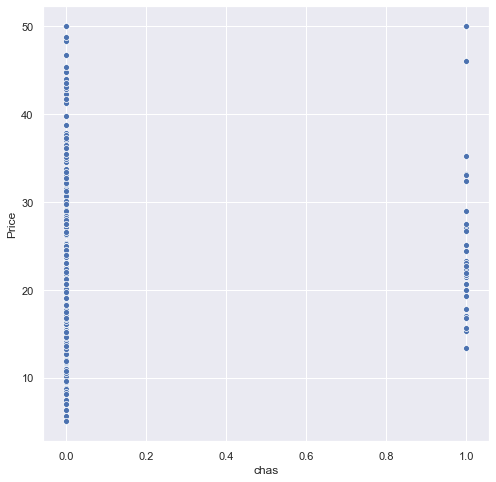

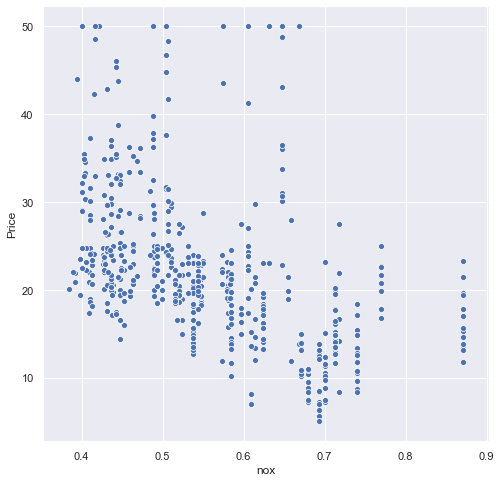

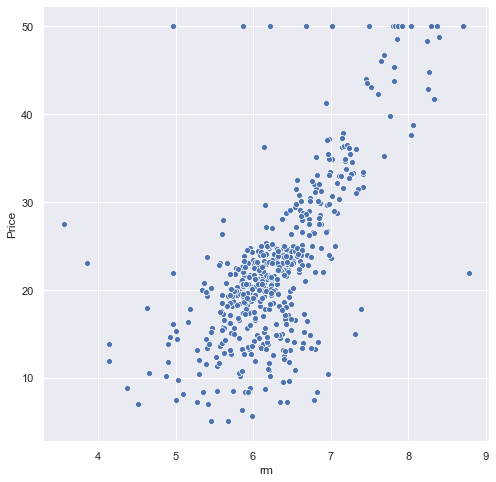

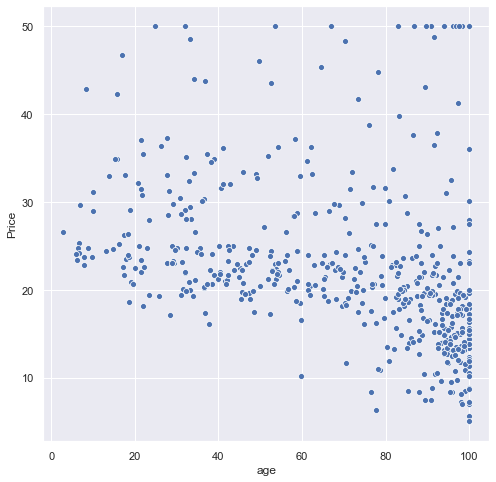

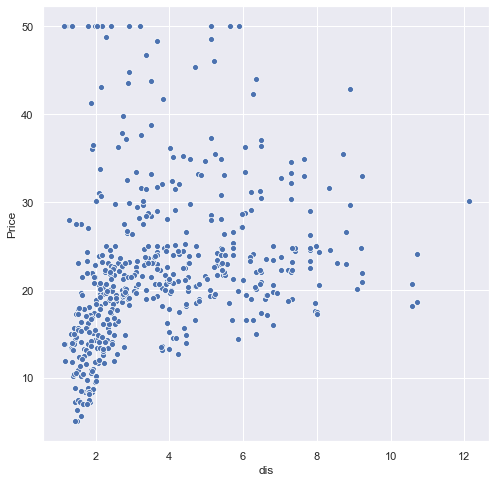

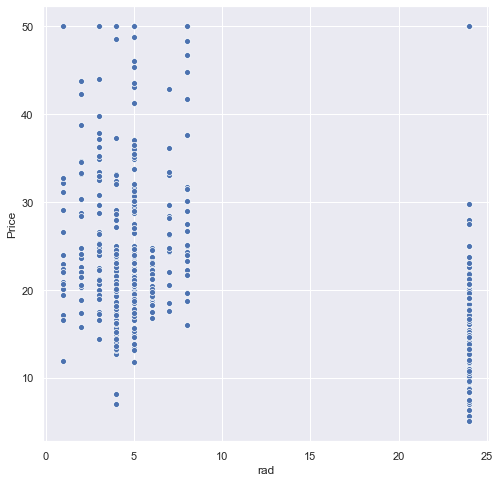

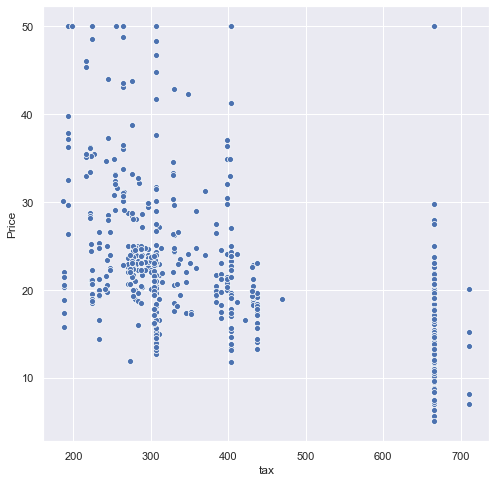

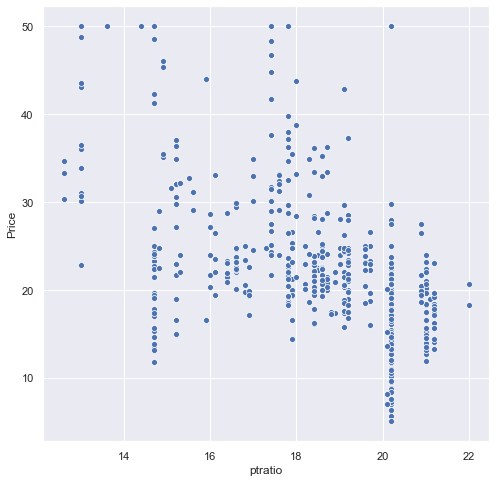

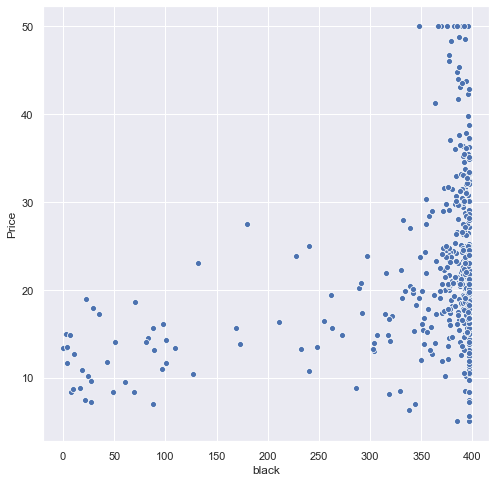

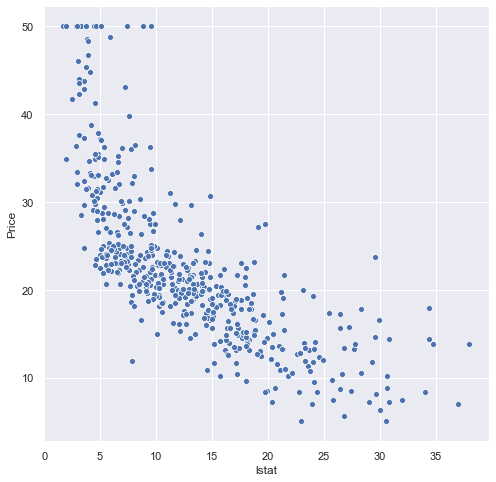

In [50]:
for i, col in enumerate(df1.columns):
   
    plt.figure(i)
    #sns.distplot(df[col])
    plt.rcParams['figure.figsize'] = (8,8)
    sns.scatterplot(x=data[col], y=data["Price"])
    

## T-test

In [51]:
# Two different methods of conducting a t-test
# import researchpy as rp
from scipy import stats

In [92]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Calculate the T-test for the means of two independent samples of scores. ->> stats.ttest_ind(a, b, ). a and b are arrays. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [94]:
print(stats.ttest_ind(df['crim'], df['Price']))
print(stats.ttest_ind(df['zn'], df['Price']))
print(stats.ttest_ind(df['indus'], df['Price']))
print(stats.ttest_ind(df['chas'], df['Price']))
print(stats.ttest_ind(df['nox'], df['Price']))
print(stats.ttest_ind(df['rm'], df['Price']))
print(stats.ttest_ind(df['age'], df['Price']))
print(stats.ttest_ind(df['dis'], df['Price']))
print(stats.ttest_ind(df['rad'], df['Price']))
print(stats.ttest_ind(df['tax'], df['Price']))
print(stats.ttest_ind(df['ptratio'], df['Price']))
print(stats.ttest_ind(df['black'], df['Price']))
print(stats.ttest_ind(df['lstat'], df['Price']))

Ttest_indResult(statistic=-33.79596814326492, pvalue=4.1376062901253735e-168)
Ttest_indResult(statistic=-10.021561247298802, pvalue=1.3371484673796902e-22)
Ttest_indResult(statistic=-22.34170938560382, pvalue=3.640810773418731e-90)
Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)
Ttest_indResult(statistic=-53.75019651593932, pvalue=1.6249099761951157e-298)
Ttest_indResult(statistic=-39.62461149680032, pvalue=6.49016750007408e-208)
Ttest_indResult(statistic=34.97390494622517, pvalue=3.209461972506852e-176)
Ttest_indResult(statistic=-44.673236529073336, pvalue=2.0336282784913355e-241)
Ttest_indResult(statistic=-23.059893897973428, pvalue=7.311699727262356e-95)
Ttest_indResult(statistic=51.40301008621802, pvalue=3.6130627946973324e-284)
Ttest_indResult(statistic=-9.706959605319538, pvalue=2.332589698522123e-21)
Ttest_indResult(statistic=81.91554430359002, pvalue=0.0)
Ttest_indResult(statistic=-19.08625489291999, pvalue=1.3813199136997922e-69)


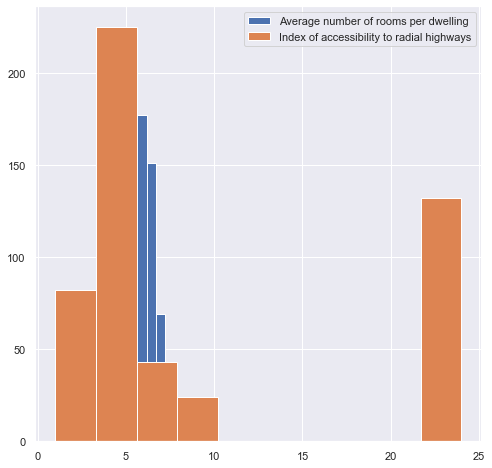

In [95]:
plt.hist(df['rm'], label='Average number of rooms per dwelling ')
plt.hist(df['rad'], label='Index of accessibility to radial highways')

plt.legend()

plt.show()

 <img src="anova.jpg" width="400" height="200" />
 
 # ANOVA Test

scipy.stats.f_oneway(*args) Performs a 1-way ANOVA. <br/>
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.<br/>
Parameters <br/>
sample1, sample2, …array_like
The sample measurements for each group.
Returns <br/>
statisticfloat
The computed F-value of the test.
pvaluefloat
The associated p-value from the F-distribution.<br/>
Notes <br/>
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
The samples are independent.
Each sample is from a normally distributed population.
The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

In [96]:
stats.f_oneway(df['rm'], df['rad'], df['tax'])

F_onewayResult(statistic=2847.2837643524194, pvalue=0.0)

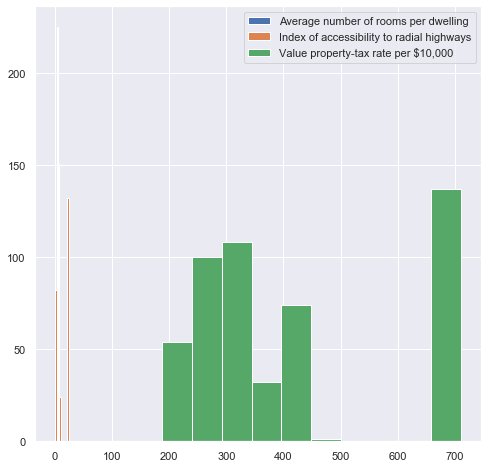

In [97]:
plt.hist(df['rm'], label='Average number of rooms per dwelling ')
plt.hist(df['rad'], label='Index of accessibility to radial highways')
plt.hist(df['tax'], label='Value property-tax rate per $10,000')

plt.legend()

plt.show()

In [98]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


![Keras](keras.png)  
# Neurons in Keras

Import additional libraries

In [58]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

In [59]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [99]:
# Use RM (average number of rooms per dwelling) as input values.
x = (df['rm'])

# Run each x value through the neural network.
y = m.predict(x)

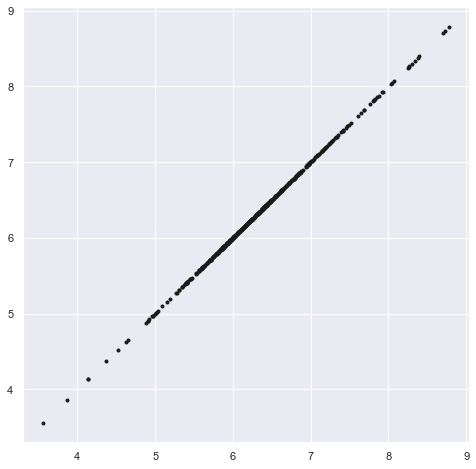

In [100]:
# Plot the values.
plt.plot(x, y, 'k.')

![scikit](scikit.png)  
# Preprocessing with Scikit Learn

In [101]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [102]:
type(df)

pandas.core.frame.DataFrame

### One-off scaling

In [103]:
# https://scikit-learn.org/stable/modules/preprocessing.html
xscale = pd.DataFrame(pre.scale(df), columns = data.columns)
xscale.iloc[0:4, 1:15]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758


In [73]:
xscale.mean()

Unnamed: 0   -3.203410e-17
crim         -8.688702e-17
zn            3.306534e-16
indus         2.804081e-16
chas         -3.100287e-16
nox          -8.071058e-16
rm           -5.978968e-17
age          -2.650493e-16
dis           8.293761e-17
rad           1.514379e-15
tax          -9.934960e-16
ptratio       4.493551e-16
black        -1.451408e-16
lstat        -1.595123e-16
Price        -4.247810e-16
dtype: float64

In [74]:
xscale.std()

Unnamed: 0    1.00099
crim          1.00099
zn            1.00099
indus         1.00099
chas          1.00099
nox           1.00099
rm            1.00099
age           1.00099
dis           1.00099
rad           1.00099
tax           1.00099
ptratio       1.00099
black         1.00099
lstat         1.00099
Price         1.00099
dtype: float64

### Fitting and Transforming

In [104]:
scaler = pre.StandardScaler()
scaler.fit(df)
scaler.scale_

array([1.46069333e+02, 8.59304135e+00, 2.32993957e+01, 6.85357058e+00,
       2.53742935e-01, 1.15763115e-01, 7.01922514e-01, 2.81210326e+01,
       2.10362836e+00, 8.69865112e+00, 1.68370495e+02, 2.16280519e+00,
       9.12046075e+01, 7.13400164e+00, 9.18801155e+00])

In [105]:
df.std()

Unnamed: 0    146.213884
crim            8.601545
zn             23.322453
indus           6.860353
chas            0.253994
nox             0.115878
rm              0.702617
age            28.148861
dis             2.105710
rad             8.707259
tax           168.537116
ptratio         2.164946
black          91.294864
lstat           7.141062
Price           9.197104
dtype: float64

In [106]:
xscale = pd.DataFrame(scaler.transform(df), columns = df.columns)
xscale.iloc[0:4, 1:15]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758


In [109]:
encoder = pre.OneHotEncoder()
encoder.fit(target)  # target taken from earlier reference to price
yencoded = encoder.transform(target)
yencoded.toarray()

C:\Users\eamonn\Anaconda4\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Whitening

#### Correlation - close to 0 means no correlation, minus one or one means well correlated. Good correlation between price and average number of rooms per dwelling "rm"

In [110]:
df.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [111]:
import sklearn.decomposition as doc

In [117]:
pca = doc.PCA(n_components = 1, whiten =True)
pca.fit(target)
xwhite = pd.DataFrame(pca.transform(target), columns=target.columns)
xwhite.head()

,Price
0,0.159528
1,-0.101424
2,1.322937
3,1.181589
4,1.486032
